In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,SGDRegressor,LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold

## Regressions and the impact of Lambda

In [6]:
#Reproduceability
np.random.seed(98823)
#number of points and randomly generate points
n=60
x=np.array([np.random.random() for i in range(n)])
#True Y model with noise
y=[-3.14159*a + 1.789 for a in x]
noise = np.random.normal(0,1/3,60)
y+=noise
df=pd.DataFrame({'X':x,'Y':y})
x=x.reshape(-1,1)
df

,X,Y
0,0.618565,-0.390420
1,0.882738,-1.144883
2,0.810349,-0.731220
3,0.708156,-0.884353
4,0.777921,-0.423120
5,0.652228,0.212650
6,0.658577,0.030360
7,0.041528,1.524871
8,0.349068,1.080555
9,0.707169,-0.121067


Text(0, 0.5, 'Y')

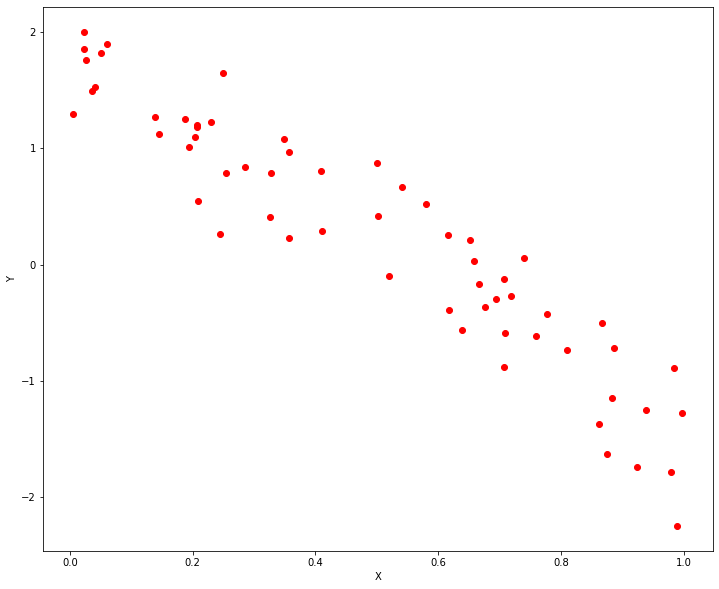

In [44]:
plt.scatter(df['X'], y, c='r')
plt.xlabel('X')
plt.ylabel('Y')

0.8795138171044071


Text(0, 0.5, 'Y')

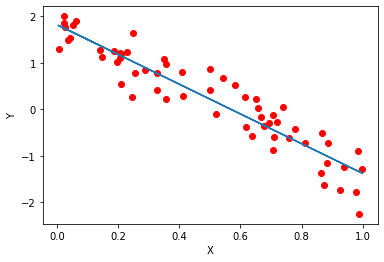

In [11]:
#Linear Regression process
least_squares = LinearRegression()
least_squares.fit(x, y)
r_sqrd = least_squares.score(x, y)
print(r_sqrd)
plt.scatter(x, y, c='r')
#Test points for regression to predict on
x_test = np.array([np.random.random() for i in range(200)])
x_test = x_test.reshape(-1,1)
y_pred=least_squares.predict(x_test)

plt.plot(x_test,y_pred)
plt.xlabel('X')
plt.ylabel('Y')

0.8795138171044071
[-3.19354995]
0.8737624143620336
[-2.93530058]
0.8598218038014851
[-2.71569351]
0.6868544194973105
[-1.69887251]


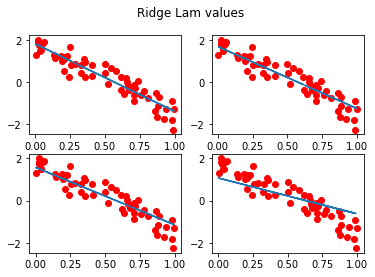

In [16]:
#subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter(x, y, c='r')
ax2.scatter(x, y, c='r')
ax3.scatter(x, y, c='r')
ax4.scatter(x, y, c='r')
fig.suptitle('Ridge Lam values')
#example lambda values, normally would gridsearch through a range
lams = [0, 0.5, 1, 5]
def ridgeplot(axs, i):
    ridge = Ridge(alpha = i)
    ridge.fit(x, y)
    r_sqrd = ridge.score(x, y)
    print(r_sqrd)
    print(ridge.coef_)
    x_test = np.array([np.random.random() for i in range(200)])
    x_test = x_test.reshape(-1,1)
    y_pred= ridge.predict(x_test)
    axs.plot(x_test,y_pred)
axes = [ax1, ax2, ax3, ax4]
for i in range(4):
    ridgeplot(axes[i], lams[i])




<ipython-input-15-7578a0d91a84>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(x, y)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.970044037089834, tolerance: 0.006590040354303648
  model = cd_fast.enet_coordinate_descent(


0.8795138171044071
[-3.19354995]
0.8554828570940759
[-2.66566663]
0.783389977063082
[-2.13778331]
0.4950184569391065
[-1.08201666]


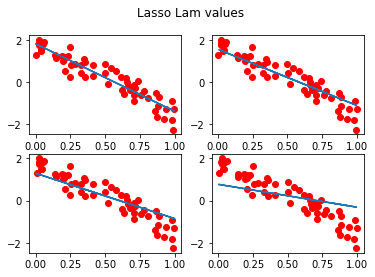

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter(x, y, c='r')
ax2.scatter(x, y, c='r')
ax3.scatter(x, y, c='r')
ax4.scatter(x, y, c='r')
fig.suptitle('Lasso Lam values')
lams = [0, 0.05, 0.1, 0.2]
def lassoplot(axs, i):
    lasso = Lasso(alpha = i)
    lasso.fit(x, y)
    r_sqrd = lasso.score(x, y)
    print(r_sqrd)
    print(lasso.coef_)
    x_test = np.array([np.random.random() for i in range(200)])
    x_test = x_test.reshape(-1,1)
    y_pred= lasso.predict(x_test)
    axs.plot(x_test,y_pred)
axes = [ax1, ax2, ax3, ax4]
for i in range(4):
    lassoplot(axes[i], lams[i])
    


## Logistic Regression Classifying MNIST
* Thanks for the tutorial: https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
* Concise explanation of multi class classification https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

In [72]:
from sklearn.datasets import load_digits
digits = load_digits()
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


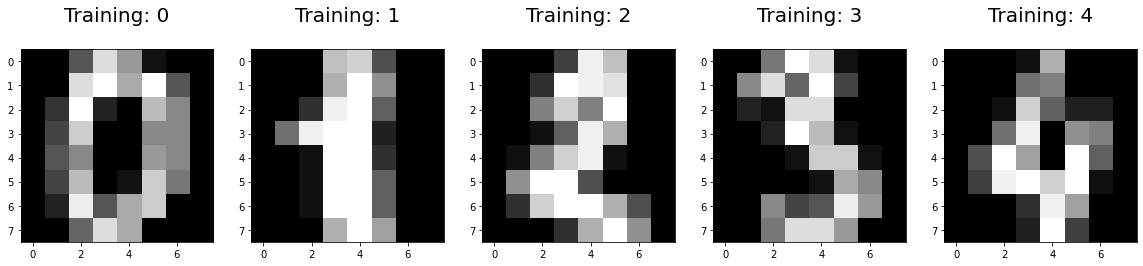

In [73]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [85]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)
logreg = LogisticRegression()

logreg.fit(x_train, y_train)
logreg.predict(x_test[0].reshape(1,-1))


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([2])

In [86]:
logreg.predict(x_test[0:10])


array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [87]:
score = logreg.score(x_test, y_test)
score

0.9511111111111111

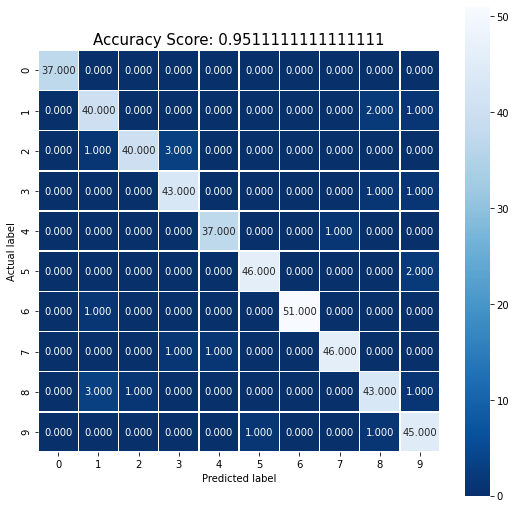

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
predictions = logreg.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);